In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 

import pydotplus as pdp
from IPython.display import Image

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')
sample = pd.read_csv('Data/sample.csv').dropna() ## Drops missing values from the dataset, and imports the dataset
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
Unnamed: 0        1000 non-null int64
App               1000 non-null object
Category          1000 non-null object
Rating            1000 non-null float64
Reviews           1000 non-null int64
Size              1000 non-null object
Installs          1000 non-null object
Type              1000 non-null object
Price             1000 non-null float64
Content Rating    1000 non-null object
Genres            1000 non-null object
Last Updated      1000 non-null object
Current Ver       1000 non-null object
Android Ver       1000 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 117.2+ KB


In [11]:
from pivottablejs import pivot_ui
pivot_ui(sample)
##This allows you to create differnt pivot charts with th data from the dataset

In [19]:
#sample['Unnamed: 0'].value_counts()

In [13]:
sample['Category2'] = pd.factorize(sample['Category'])[0]
sample['Genres2'] = pd.factorize(sample['Genres'])[0]
sample['Type2'] = pd.factorize(sample['Type'])[0]
sample['Installs2'] = pd.factorize(sample['Installs'])[0]
sample.head()

   Unnamed: 0                                                App  \
0        2682                                      Family Dollar   
1        3978                                 CARDI B WALLPAPERS   
2        9985  Doll House Design & Decoration 2: Girls House ...   
3        5751                              Analog Clock AW-7 PRO   
4        8027                                  Morse Player Free   

          Category  Rating  Reviews  Size   Installs  Type  Price  \
0         SHOPPING     4.3     2588   21M  1,000,000  Free   0.00   
1  PERSONALIZATION     4.1        8  4.5M      1,000  Free   0.00   
2           FAMILY     3.9     2338   45M    100,000  Free   0.00   
3            TOOLS     3.3       40  2.7M      1,000  Paid   1.99   
4           FAMILY     4.2      268  4.2M     50,000  Free   0.00   

  Content Rating           Genres Last Updated Current Ver   Android Ver  \
0       Everyone         Shopping    23-Jul-18       2.4.0    4.1 and up   
1       Everyone  Person

In [14]:
from sklearn.cross_validation import train_test_split

# define the X and y variables

X = sample.drop(['Android Ver', 'App','Size','Current Ver','Genres','Rating','Content Rating','Last Updated','Price',
                 'Type','Installs','Category','Unnamed: 0'], axis = 1) ##Drops the Product_ID varible ##(it was probematic)
features = X.columns 

y = sample['Installs2']

# Instruction: change the value of random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

# use the train set to create the models, and use test set to evaluate models. 

# Decision Tree

In [15]:
def print_tree(estimator, features, class_names=None, filled=True): ## function to define our decision tree
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [16]:
from sklearn.tree import DecisionTreeClassifier
x2 = X_train
y2 = y_train
clf = DecisionTreeClassifier(max_depth=2, max_features=2) ## our decision tree clasifier
clf.fit(x2,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

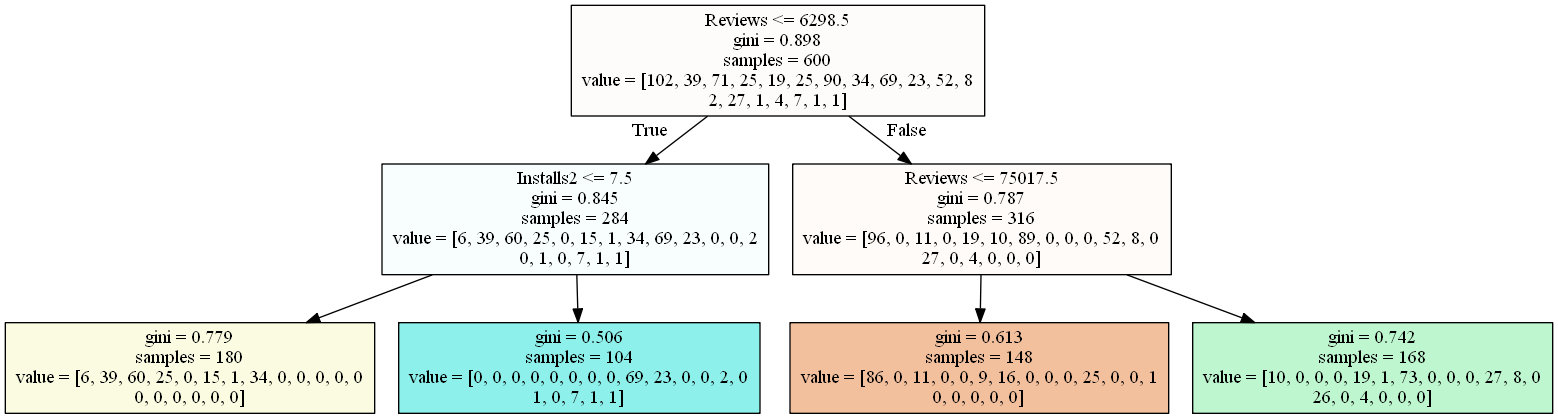

In [17]:
graph = print_tree(clf, features=X.columns)
Image(graph.create_png())

[('Reviews', 0.6390975618297581), ('Category2', 0.0), ('Genres2', 0.0), ('Type2', 0.0), ('Installs2', 0.36090243817024187)]


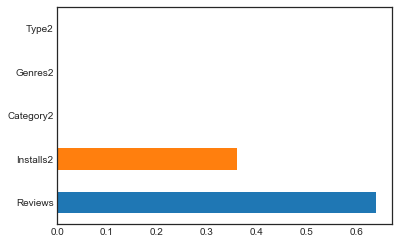

In [18]:
# View a list of the features and their importance scores
print(list(zip(X_train, clf.feature_importances_)))

# plot the important features
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features=4,random_state=1)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

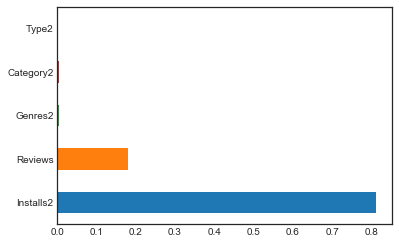

In [15]:
# plot the important features. Run the following code.
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

# Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5))


# Instruction: fill in the names of the five variables

nn_columns = ['Reviews','Installs2']
mlp.fit(X_train[nn_columns],y_train)

C:\Users\Chappell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

print('Accuracy of Neural Network classifier on test set: {:.2f}'
     .format(mlp.score(X_test[nn_columns], y_test)))



Accuracy of Decision Tree classifier on test set: 0.46
Accuracy of Random Forest classifier on test set: 0.99
Accuracy of Neural Network classifier on test set: 0.14
